In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline  # Import Pipeline

In [2]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        label = subfolder  # Use subfolder name as label
        subfolder_path = os.path.join(folder, subfolder)
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load grayscale to reduce dims
                img = cv2.resize(img, (128, 128))  # Ensure all images match size (common error and critical assumption by standard methods in sklearn expecting consistent sizing for input sample sets, even when done behind the scenes)
                images.append(img.flatten()) # Turn matrix into simple vector for standard sklearn application (flatten layer)  as input has to be consistent set or matrix with identical row length at this step in standard versions 
                labels.append(label) 
            except Exception as e:  #Handles some cases, yet basic as real image loader functions involve complex/optimized checks done for this purpose
                print(f"Error loading image {img_path}: {e}")

    return np.array(images), np.array(labels)


In [3]:
# --- Load and prepare data ---
data_folder = "animal"  # Or wherever you kept your dataset of animals labelled as either cat or dog with matching structure

X, y = load_images_from_folder(data_folder)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #Tiny split with tiny data, but illustrates setup

In [7]:
# --- Train  K-NN ---


knn_pipe = Pipeline([
    ('scaler', StandardScaler()),   
    ('knn', KNeighborsClassifier(n_neighbors=3))  #Small k since little training samples for initial estimate.
])

In [8]:
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [9]:
y_pred = knn_pipe.predict(X_test)

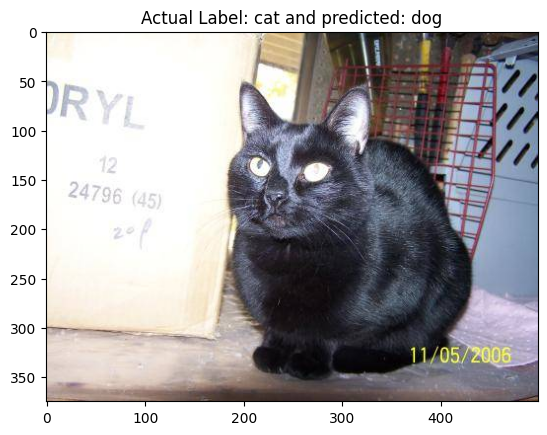

In [10]:
# Display misclassified images
misclassified_indices = np.where(y_pred != y_test)[0]
for idx in misclassified_indices:

    img_path = os.path.join(data_folder, y_test[idx], os.listdir(os.path.join(data_folder, y_test[idx]))[idx%10]) # This assumes 10 images within each labelled folder, as initally described 
    try:

        plt.figure()
        img = plt.imread(img_path)
        plt.imshow(img) # Actual images in matplot lib, as part of interactive python run session display to screen following import (needs to open and appear during active python terminal)
        plt.title(f"Actual Label: {y_test[idx]} and predicted: {y_pred[idx]}")
        plt.show()

    except Exception as e: 
        print(f"Error while trying to display image (if using non-interactive sessions like IDEs) : {e}") # basic image loader for fast visualization within test code assuming matplotlib import can use an active python kernel for visual outputs


In [11]:
# --- Evaluate the model ---

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         cat       1.00      0.50      0.67         2
         dog       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

